In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [80]:
df=pd.read_csv("AirPassengers.csv")

In [81]:
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [82]:
## Parse strings to date time type
df['Month']=pd.to_datetime(df['Month'],infer_datetime_format=True)
indexed_df=df.set_index(['Month'])


In [83]:
from datetime import datetime
indexed_df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [84]:
indexed_df.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [85]:
indexed_df.shape

(144, 1)

In [86]:
indexed_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Data columns (total 1 columns):
#Passengers    144 non-null int64
dtypes: int64(1)
memory usage: 2.2 KB


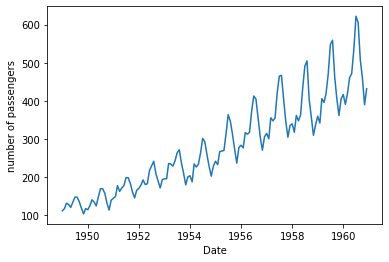

In [87]:
##plot the Graph
plt.xlabel("Date")
plt.ylabel("number of passengers")
plt.plot(indexed_df)

In [88]:
## above graph conveys the trend which is increasing and it is not stationary(as mean is not constant
#  throught all the years)

In [89]:
## There are two tests which can help us in checking the stationarity of the data
## 1.Rolling statistics
## 2.Dickey fuller test

In [90]:
## Determining rolling statistics

rolmean=indexed_df.rolling(window=12).mean()

## Window=12 will give us mean and std at yearly level for day level window=365

rolstd=indexed_df.rolling(window=12).std()
print(rolmean,rolstd)

## The first 11 values for both mean and sd are null because the window=12

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


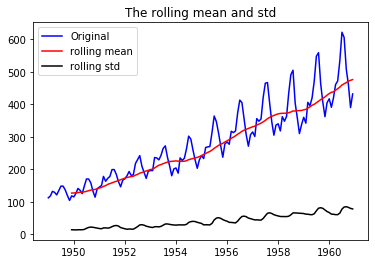

In [91]:
## Plotting the rolling statistics
orig=plt.plot(indexed_df,color='blue',label='Original')
mean=plt.plot(rolmean,color='red',label='rolling mean')
std=plt.plot(rolstd,color='black',label='rolling std')
plt.legend(loc='best')
plt.title("The rolling mean and std")
plt.show(block=False)

## So as the mean and std are not constant they are not stationary

In [92]:
indexed_df.columns

Index(['#Passengers'], dtype='object')

In [93]:
##perform Dickey Fuller test

from statsmodels.tsa.stattools import adfuller
print("resultz of dickey fuller test")
dftest=adfuller(indexed_df['#Passengers'],autolag='AIC')

dfoutput=pd.Series(dftest[0:4],index=['test-static','p-value','#lags used','no. of obs used'])
for key,value in dftest[4].items():
    dfoutput['critical value (%s)'%key]=value
print(dfoutput)

resultz of dickey fuller test
test-static               0.815369
p-value                   0.991880
#lags used               13.000000
no. of obs used         130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64


In [94]:
## Test statistic < critical value so we cannot reject null hypothesis
## so we can say that the data is not stationary

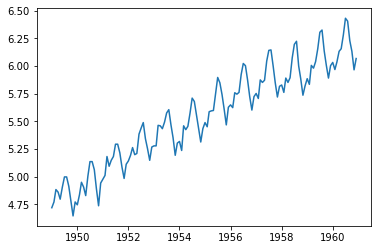

In [95]:
## Estimating the trend
# we take log scale because the data we have is not stationary

indexed_df_logscale=np.log(indexed_df)
plt.plot(indexed_df_logscale)

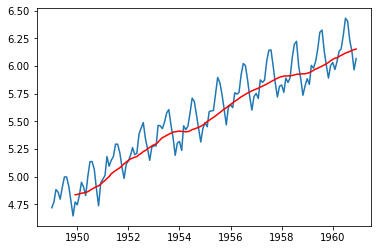

In [96]:
## Calculating the moving average with the same window=12

moving_avg=indexed_df_logscale.rolling(window=12).mean()
moving_std=indexed_df_logscale.rolling(window=12).std()
plt.plot(indexed_df_logscale)
plt.plot(moving_avg,color='red')


In [97]:
## Still its not stationarty i.e. the mean is varying with time...so we then go for some other 
## techniques to make it stationary.
## it depends on our data what method to use to make it stationary log,sqrt,cuberoot etc....

In [98]:
logscaled_minus_movingavg=indexed_df_logscale-moving_avg
logscaled_minus_movingavg.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [99]:
## remove NaN values
logscaled_minus_movingavg.dropna(inplace=True)
logscaled_minus_movingavg.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


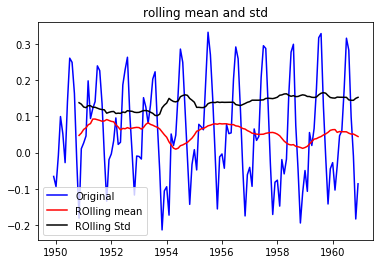

the results of dickey fuller test
test-stat                -3.162908
p-value                   0.022235
#lags used               13.000000
# of obs                119.000000
critical value (1%)      -3.486535
critical value (5%)      -2.886151
critical value (10%)     -2.579896
dtype: float64


In [100]:
## Now again checking for the stationarity which includes rolling and dickey full tests...
from statsmodels.tsa.stattools import adfuller
def test_stationary(timeseries):
    
    ## Rolling stats
    rolmean=timeseries.rolling(window=12).mean()
    rolstd=timeseries.rolling(window=12).std()
    
    ##plotting rolling statistics
    orig=plt.plot(timeseries,color='blue',label="Original")
    mean=plt.plot(rolmean,color='red',label='ROlling mean')
    std=plt.plot(rolstd,color='black',label='ROlling Std')
    plt.legend(loc='best')
    plt.title("rolling mean and std")
    plt.show(block=False)
    
    ##Perform dickey fuller test
    print("the results of dickey fuller test")
    dftest=adfuller(timeseries['#Passengers'],autolag='AIC')
    dfoutput=pd.Series(dftest[0:4],index=['test-stat','p-value','#lags used','# of obs'])
    for key,value in dftest[4].items():
        dfoutput['critical value (%s)'%key]=value

    print(dfoutput)

    
test_stationary(logscaled_minus_movingavg)

In [101]:
## now look at the curve above and the stats values for conclusion of stationarity .....
##  curve looks like there is no trend as such and the stat values is as close to as crit 
## so now our data is stationary

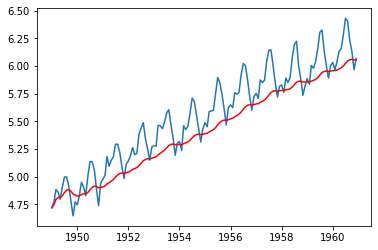

In [102]:
## Calculation of weighted average for time series to find the trend inside the tymseries....

exponentialdecay_weightedavg=indexed_df_logscale.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(indexed_df_logscale)
plt.plot(exponentialdecay_weightedavg,color='red')

In [103]:
## we can see that as the time series is progressing the avg is also progressing so here the trend
## is upward and it keeps on increasing wrt time.

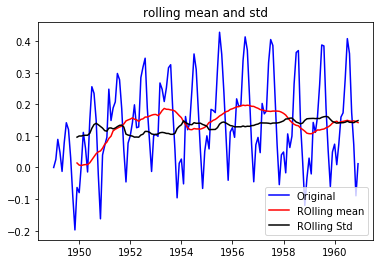

the results of dickey fuller test
test-stat                -3.601262
p-value                   0.005737
#lags used               13.000000
# of obs                130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64


In [104]:
## ANother transformation to check stationarity, we subtract weighted avg from the log scale value

logscale_minus_expdecayweightedavg=indexed_df_logscale-exponentialdecay_weightedavg
test_stationary(logscale_minus_expdecayweightedavg)

In [105]:
## Here the p-value is very very less and the timeseries is stationary here...

## in this way the transformations could be used for checking stationarity and they can be used in 
## our time series anlysis..

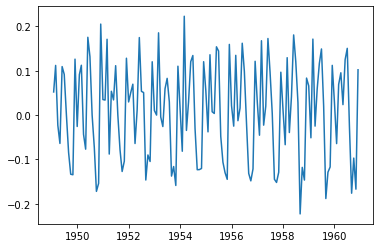

In [106]:
log_diffshifting=indexed_df_logscale-indexed_df_logscale.shift()
plt.plot(log_diffshifting)

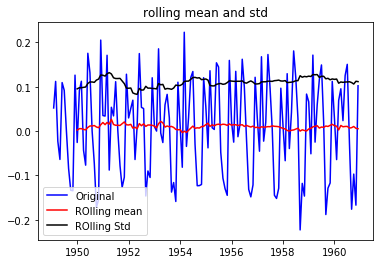

the results of dickey fuller test
test-stat                -2.717131
p-value                   0.071121
#lags used               14.000000
# of obs                128.000000
critical value (1%)      -3.482501
critical value (5%)      -2.884398
critical value (10%)     -2.578960
dtype: float64


In [107]:
log_diffshifting.dropna(inplace=True)
test_stationary(log_diffshifting)

In [108]:
## the mean and sd are too flat and the null hypo. is rejected and our time series is stationary now.
## there seems to be no trend visually..

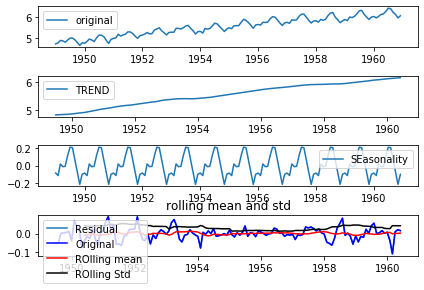

the results of dickey fuller test
test-stat              -6.332387e+00
p-value                 2.885059e-08
#lags used              9.000000e+00
# of obs                1.220000e+02
critical value (1%)    -3.485122e+00
critical value (5%)    -2.885538e+00
critical value (10%)   -2.579569e+00
dtype: float64


In [109]:
## components of time series

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(indexed_df_logscale)

trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid

plt.subplot(411)
plt.plot(indexed_df_logscale,label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend,label='TREND')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='SEasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual,label='Residual')
plt.legend(loc='best')

plt.tight_layout()

decomposedlogdata=residual
decomposedlogdata.dropna(inplace=True)
test_stationary(decomposedlogdata)


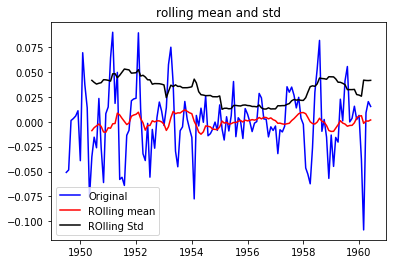

the results of dickey fuller test
test-stat              -6.332387e+00
p-value                 2.885059e-08
#lags used              9.000000e+00
# of obs                1.220000e+02
critical value (1%)    -3.485122e+00
critical value (5%)    -2.885538e+00
critical value (10%)   -2.579569e+00
dtype: float64


In [110]:
decomposedlogdata=residual
decomposedlogdata.dropna(inplace=True)
test_stationary(decomposedlogdata)

In [111]:
## it shows that the above time series for residual is not stationary so we need to have moving averages 
## over there so that it smoothens it out and predict what will happen nxt..

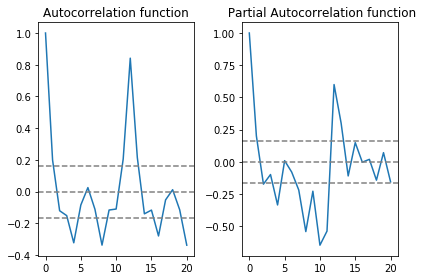

In [112]:
## next step is knowing the values of D,P-value of autoreg. lags ,Q-value of moving avg
## so we plot acf and pacf graphs for p and q values
# value of D = from the above graph
# value of p = pacf graph(partial autocorrelation graph)
# value of q = acf graph(autocorrelation graph)

from statsmodels.tsa.stattools import pacf,acf
lag_acf=acf(log_diffshifting,nlags=20)
lag_pacf=pacf(log_diffshifting,nlags=20,method='ols')

##plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_diffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_diffshifting)),linestyle='--',color='gray')
plt.title("Autocorrelation function")

##plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(log_diffshifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(log_diffshifting)),linestyle='--',color='gray')
plt.title(" Partial Autocorrelation function")
plt.tight_layout()


plotting AR model


C:\Users\Madhan Dasari\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Madhan Dasari\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


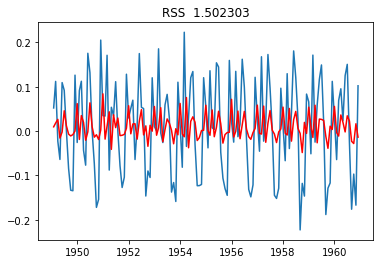

In [113]:
#value of p frm pacf and q from caf (is the value at point where the graph touches x axis for 1st tym)
## frm above graphs both p and q are 2

## now we have value of p q and d then we substitute these values in our arima model
## their order is(p,d,q)
## MR model = if p=0 and keeping q and d same
## AR model = if q=0 and keeping d and p same
## in this case we have d=1,p=q=2
## lesser the RSS value better is our model so we go for AR or MA or ARIMA based on lesser RSS value.

from statsmodels.tsa.arima_model import ARIMA

## AR model
model=ARIMA(indexed_df_logscale,order=(2,1,0))
results_AR=model.fit(disp=-1)
plt.plot(log_diffshifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title("RSS % 4f"%sum((results_AR.fittedvalues-log_diffshifting['#Passengers'])**2))
print("plotting AR model")

plotting MA model


C:\Users\Madhan Dasari\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Madhan Dasari\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


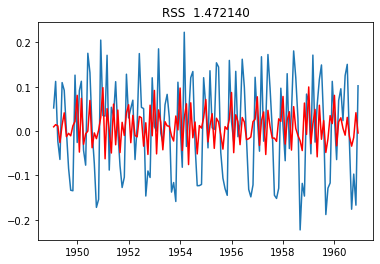

In [114]:
## MA model
model=ARIMA(indexed_df_logscale,order=(0,1,2))
results_AR=model.fit(disp=-1)
plt.plot(log_diffshifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title("RSS % 4f"%sum((results_AR.fittedvalues-log_diffshifting['#Passengers'])**2))
print("plotting MA model")

C:\Users\Madhan Dasari\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Madhan Dasari\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


plotting ARIMA model


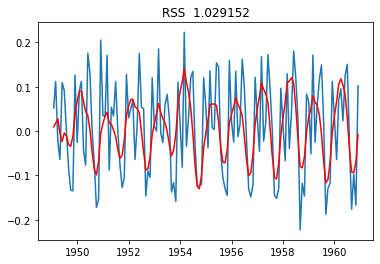

In [115]:
## ARIMA model
model=ARIMA(indexed_df_logscale,order=(2,1,2))
results_AR=model.fit(disp=-1)
plt.plot(log_diffshifting)
plt.plot(results_AR.fittedvalues,color='red')
plt.title("RSS % 4f"%sum((results_AR.fittedvalues-log_diffshifting['#Passengers'])**2))
print("plotting ARIMA model")

In [116]:
## So here the arima model has lesser RSS value when compared to MA and AR models

In [117]:
predictions_Arima_diff=pd.Series(results_AR.fittedvalues,copy=True)
print(predictions_Arima_diff.head())

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


In [118]:
## convert to cumilative sum
predictions_Arima_diff_cumsum=predictions_Arima_diff.cumsum()
print(predictions_Arima_diff.cumsum().head())

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [120]:

predictions_Arima_log=pd.Series(indexed_df_logscale['#Passengers'].ix[0],index=indexed_df_logscale.index)
predictions_Arima_log=predictions_Arima_log.add(predictions_Arima_diff_cumsum,fill_value=0)
predictions_Arima_log.head()

C:\Users\Madhan Dasari\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  


Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

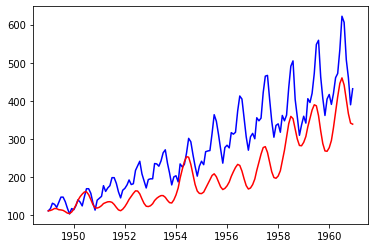

In [122]:
## converting them into its original scale
predictions_Arima=np.exp(predictions_Arima_log)
plt.plot(indexed_df,color='blue')
plt.plot(predictions_Arima,color='red')

## the magnitude only varying whereas the shape of our Arima model is same as the original curve

In [123]:
indexed_df_logscale

,#Passengers
Month,
1949-01-01,4.718499
1949-02-01,4.770685
1949-03-01,4.882802
1949-04-01,4.859812
1949-05-01,4.795791
...,...
1960-08-01,6.406880
1960-09-01,6.230481
1960-10-01,6.133398


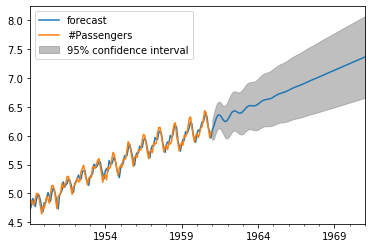

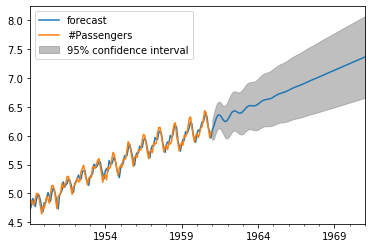

In [125]:
## predictions (forecasting)
## we have 144 rows means 144/12= 12 years data and let us say we forecast that values for
## the next 10 years then 144+10*12=264
results_AR.plot_predict(1,264)

##(1,264) = 1-is the index and 264-is the no of rows we required

In [126]:
results_AR.forecast(steps=120)

(array([6.09553391, 6.15281403, 6.2244297 , 6.29241111, 6.3416473 ,
        6.36359377, 6.35784699, 6.33139313, 6.29597544, 6.26447712,
        6.2473832 , 6.25025165, 6.27275832, 6.30940312, 6.35151498,
        6.38988664, 6.41727392, 6.43011064, 6.42906696, 6.4184249 ,
        6.40456151, 6.39403607, 6.39183072, 6.40019494, 6.41833686,
        6.44295406, 6.46937438, 6.49293991, 6.51024124, 6.51989037,
        6.52267578, 6.52112382, 6.51864518, 6.51853678, 6.5231191 ,
        6.5332235 , 6.54812862, 6.56591553, 6.58410307, 6.60036539,
        6.61313265, 6.62192778, 6.62737782, 6.63093119, 6.63438676,
        6.63937971, 6.64696491, 6.65739828, 6.67015315, 6.68414243,
        6.6980662 , 6.71077894, 6.72157725, 6.73033974, 6.73749799,
        6.74386365, 6.75037307, 6.75782576, 6.76668666, 6.77699808,
        6.78841306, 6.80032841, 6.81207183, 6.82308748, 6.83307123,
        6.84202478, 6.85022296, 6.85811203, 6.86617322, 6.87479132,
        6.88416284, 6.89426366, 6.90487872, 6.91